In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import ast

In [8]:
df = pd.read_pickle("./results/frozen_lake_results.pkl")



In [9]:
display(df.head())

,is_training,render,is_slippery,n_episodes,map_name,seed,learning_rate_a,discount_factor_gamma,epsilon,epsilon_decay_rate,rewards_per_episode,sum_rewards
0,True,False,False,15000,4x4,20,0.01,0.01,1,0.0001,"[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, ..."
1,True,False,False,15000,4x4,20,0.01,0.50,1,0.0001,"[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 4.0, ..."
2,True,False,False,15000,4x4,20,0.01,0.95,1,0.0001,"[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, ..."
3,True,False,False,15000,4x4,20,0.10,0.01,1,0.0001,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ..."
4,True,False,False,15000,4x4,20,0.10,0.50,1,0.0001,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, ..."


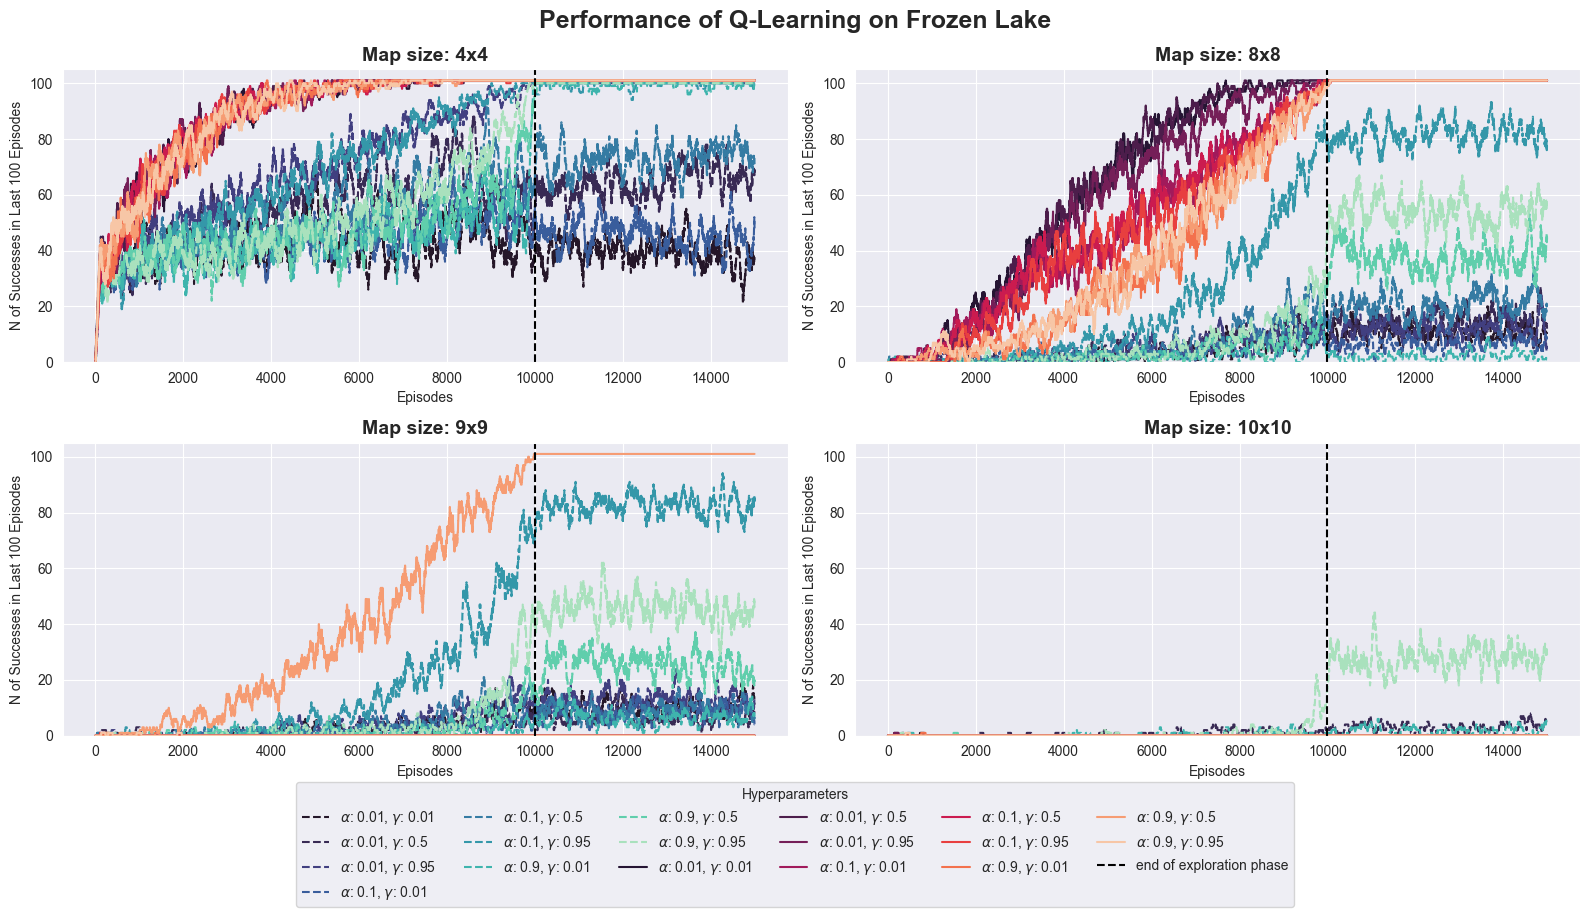

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results(df, map_names):
    num_plots = len(map_names)
    fig, axes = plt.subplots(num_plots//2, 2, figsize=(16,8), squeeze=True)
    axes = axes.flatten()  # Flatten the 2D array of subplots to a 1D array
    
    for i, map_name in enumerate(map_names):
        df_map = df[df['map_name'] == map_name]
        ax = axes[i]  # Get the specific subplot for the current map_name
        
        df_slippery = df_map[df_map['is_slippery'] == True]
        colors_slippery = sns.color_palette("mako", len(df_slippery)).as_hex()
        ii = 0
        for index, row in df_slippery.iterrows():
            alpha = row['learning_rate_a']
            gamma = row['discount_factor_gamma']
            label = f"$\\alpha$: {alpha}, $\\gamma$: {gamma}"
            # Subtract 1 from the rewards to get the number of successes in the last 100 episodes
            rewards =(np.array(row['sum_rewards'])).clip(0, 100)
            ax.plot(np.arange(len(row['sum_rewards'])), rewards, label=label, linestyle="dashed", color=colors_slippery[ii])
            ii += 1
            
        df_solid = df_map[df_map['is_slippery'] == False]
        colors_solid = sns.color_palette("rocket", len(df_solid)).as_hex()
        ii = 0
        for index, row in df_solid.iterrows():
            alpha = row['learning_rate_a']
            gamma = row['discount_factor_gamma']
            label = f"$\\alpha$: {alpha}, $\\gamma$: {gamma}"
            ax.plot(np.arange(len(row['sum_rewards'])), row['sum_rewards'], label=label, linestyle="solid", color=colors_solid[ii])
            ii += 1
            
        # Plot a vertical line at 100 episodes
        ax.axvline(x=10000, color='black', linestyle='--', label="end of exploration phase")
        ax.set_xlabel('Episodes')
        ax.set_ylabel('N of Successes in Last 100 Episodes')
        ax.set_title(f'Map size: {map_name}', fontsize=14, fontweight="bold")
        ax.grid(True)
        ax.set_ylim(0, 105)  # Set y-axis limits
        
    # Display a single legend for all subplots
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=len(labels)//3, title='Hyperparameters')
    fig.suptitle('Performance of Q-Learning on Frozen Lake', fontsize=18, fontweight="bold")
    plt.tight_layout()  # Adjust the subplot layout to make room for the suptitle
    plt.savefig('./plots/frozen_lake_rewards_all_maps.png', bbox_inches='tight')  # Save the plot with tight bounding box
    plt.show()

# Assuming 'df' is your DataFrame containing the data
map_names = df['map_name'].unique()  # Assuming this gives you all unique map names
plot_results(df, map_names)